# EXTENDED PRACTICAL TASK - 210928411

## Practical Three - Probability Distribution

### Downloading the packages needed

These packages will help with data visualisation for the extended section, where I am producing/plotting density plots:

• **gplot2** - A package that helps with producing statistical/data graphics like density and violin plots

• **patchwork** - A package that helps with plot compositions and enhances the ggplot2 package when producing the plots

• **tidyverse** - A package that helps with tidying datasets and helps with changing formats using the %>% function.

In [5]:
install.packages("ggplot2")
install.packages("patchwork")
install.packages("tidyverse")

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
library(ggplot2)
library(patchwork)
library(tidyverse)

### Reading the files

Using the file from the practical, which is the measles.csv file, I used the ```read.csv()```, so the measles file could be read and held in a variable.

After, I used ```head()``` to view/display the beginning of the csv file and ```str()``` to show the structure of the csv files, showcasing the rows and columns/observations and variables.
 

In [3]:
measles <- read.csv("measles.csv")

head(measles)
str(measles)

,Region,Island,Population,Susceptibles.inut,Measles.reporting.rate,Percentage.months.measles
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Atlantic,Iceland,160000,4490,45,61
2,Atlantic,Greenland,28000,1190,111,24
3,Atlantic,Bermuda,41000,1130,10,51
4,Atlantic,Faroes,34000,744,24,32
5,Atlantic,St Helena,5000,116,54,4
6,Atlantic,Falkland,2500,43,NA,0


'data.frame':	19 obs. of  6 variables:
 $ Region                   : chr  "Atlantic" "Atlantic" "Atlantic" "Atlantic" ...
 $ Island                   : chr  "Iceland" "Greenland" "Bermuda" "Faroes" ...
 $ Population               : int  160000 28000 41000 34000 5000 2500 550000 345000 118000 110000 ...
 $ Susceptibles.inut        : int  4490 1190 1130 744 116 43 167000 13400 4440 4060 ...
 $ Measles.reporting.rate   : int  45 111 10 24 54 NA 24 8 9 6 ...
 $ Percentage.months.measles: int  61 24 51 32 4 0 100 64 28 32 ...


### Plotting Histograms

After placing my measles.csv file into a variable, I created a series of histograms to visualise the different aspects of each numerical variables.

the ```par(mfrow = c(2,2))``` is to make a 2x2 plot, so all the four graphs can fit into one image

This code is done by automating my previous answer from the practical in the first week on Tuesday by using a for loop

In [ ]:
columns <- c("Population", "Susceptibles.inut", "Measles.reporting.rate", "Percentage.months.measles")
colours <- c("midnightblue", "mistyrose", "purple", "skyblue")
par(mfrow = c(2, 2))

for (x in 1:length(columns)) {
  hist(
    measles[[columns[x]]],               
    main = paste("Histogram of", columns[x]),
    xlab = columns[x],
    breaks = 10,
    col = colours[x]                     
  )
}

### Box plots

After completing the automation of the code for the histograms, I needed to generate a boxplot using the ```boxplot()``` function. The boxplots present how the population sizes are related to the regions.

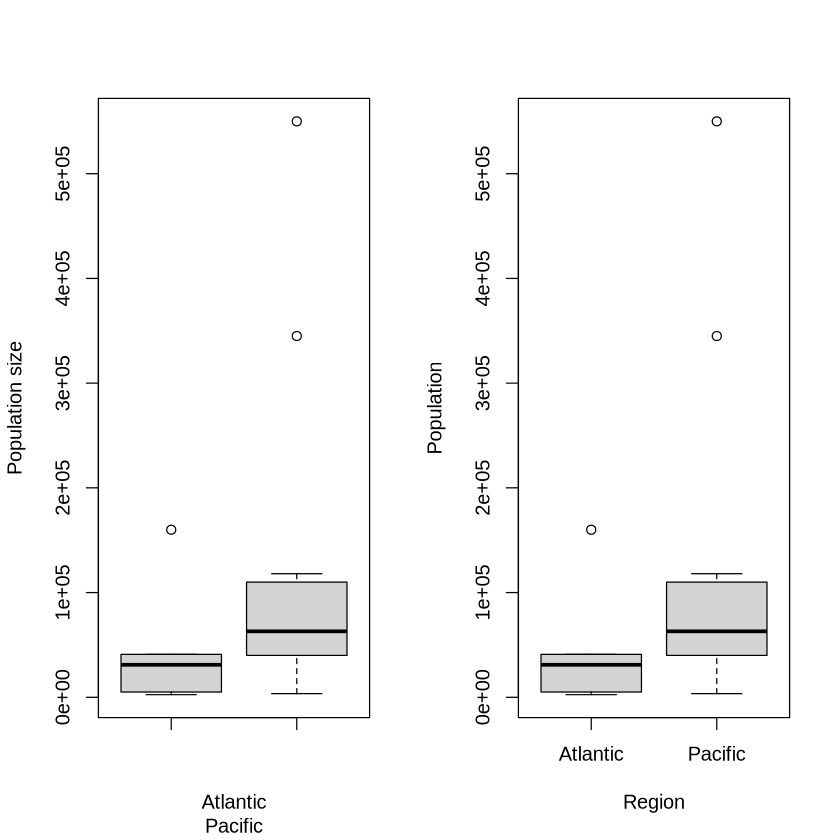

In [17]:
par(mfrow = c(1, 2))

boxplot(measles$Population[measles$Region=="Atlantic"], 
        measles$Population[measles$Region=="Pacific"],
        ylab="Population size",
        xlab=c("Atlantic", "Pacific"))

boxplot(formula=Population~Region, data=measles)

### Scatterplots

After completing the boxplots for the second task, I needed to generate two scatterplots using the ```plot()``` function showcasing the percent of months with measles reported against susceptibles input and population size.

After, I decided to create two more boxplots showing measles reporting rate against susceptibles input and population. From anaylsing the graphs, this is what I concluded:

• **Susceptibles Input vs. Percentage Months Measles** - The points are going upwards, like a vertical line, with one point near the top right corner, meaning there is a **moderate positive correlation** between the two variables.

• **Population vs. Percentage months Measles** - The points are going upwards meaning it's a **strong/moderate positive correlation** between the two variables.

• **Susceptibles Input vs. Measles Reporting Rate** - The points are similar to the first graph (Susceptibles Input vs. Percentage Months Measles). However, the last point is lower, showcasing a **weak negative correlation**  between the two variables.

• **Population vs. Measles Reporting Rate** - The points are descending compared to graph 2 (Population vs. Percentage months Measles) meaning there is a **negative correlation** between the two variables.

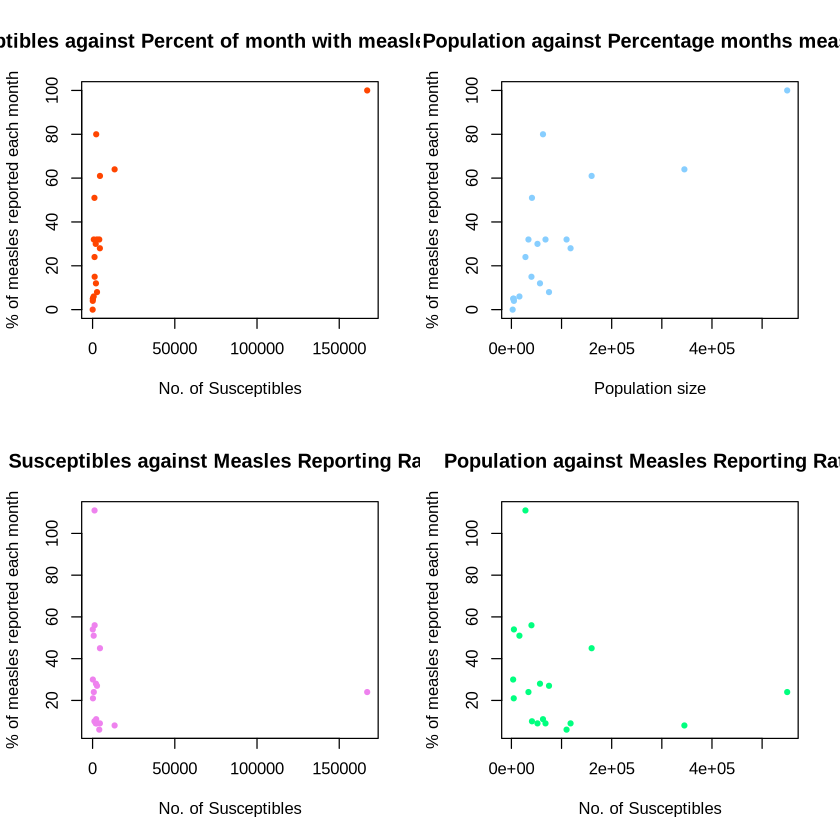

In [18]:
par(mfrow = c(2, 2))

plot(measles$Susceptibles.inut, measles$Percentage.months.measles,
     xlab = "No. of Susceptibles",
     ylab = "% of measles reported each month",
     main = "Susceptibles against Percent of month with measles reported",
     pch = 20,
     col = "orangered",
)

plot(measles$Population, measles$Percentage.months.measles,
     xlab = "Population size",
     ylab = "% of measles reported each month",
     main = "Population against Percentage months measles",
     pch = 20,
     col = "skyblue1",
)

plot(measles$Susceptibles.inut, measles$Measles.reporting.rate,
     xlab = "No. of Susceptibles",
     ylab = "% of measles reported each month",
     main = "Susceptibles against Measles Reporting Rates",
     pch = 20,
     col = "violet",
)

plot(measles$Population, measles$Measles.reporting.rate,
     xlab = "No. of Susceptibles",
     ylab = "% of measles reported each month",
     pch = 20,
     main = "Population against Measles Reporting Rate",
     col = "springgreen1"
)

### Scatterplots - Correlation Testing

After plotting the scattarplots, I decided it was appropriate to conduct a correlation test using the ```cor.test()``` function to confirm my analysis. Then, I coded a matrix using the ```matrix()``` to view the correlation coefficient and p-values more easily.

• **Susceptibles Input vs. Percentage Months Measles** - Since the p-value is 0.0042 < 0.05, it is **statistically significant**.

• **Population vs. Percentage months Measles** - Since the p-value is 0.00011 < 0.05, it is **statistically significant**.

• **Susceptibles Input vs. Measles Reporting Rate** - Since the p-value is 0.756 > 0.05, it is not **statistically significant**.

• **Population vs. Measles Reporting Rate** - Since the p-value is 0.365 > 0.05, it is not **statistically significant**.

In [12]:
# Susceptibles Input vs. Percentage Months Measles
cor_test_sp <- cor.test(measles$Susceptibles.inut, measles$Percentage.months.measles, method = 'pearson')

# Population vs. Percentage months Measles
cor_tes_pp <- cor.test(measles$Population, measles$Percentage.months.measles, method = 'pearson')

# Susceptibles Input vs. Measles Reporting Rate
cor_test_sm <- cor.test(measles$Susceptibles.inut, measles$Measles.reporting.rate, method = 'pearson')

# Population vs. Measles Reporting Rate
cor_test_pm <- cor.test(measles$Population, measles$Measles.reporting.rate, method = 'pearson')

# Creating a matrix
cor_correlation <- c(cor_test_sp$estimate,
                     cor_tes_pp$estimate,
                     cor_test_sm$estimate,
                     cor_test_pm$estimate
                     )
cor_p_value <- c(cor_test_sp$p.value,
                     cor_tes_pp$p.value,
                     cor_test_sm$p.value,
                     cor_test_pm$p.value
                     )

matrix <- matrix(
    c(cor_correlation, cor_p_value),
    ncol = 2,
    byrow = FALSE
    )

rownames(matrix) <- c("Susceptibles Input vs. Percentage Months Measles",
                     "Population vs. Percentage months Measles",
                     "Susceptibles Input vs. Measles Reporting Rate",
                     "Population vs. Measles Reporting Rate"
                     )
colnames(matrix) <- c("Correlation", "P-Value")
print(matrix)

                                                 Correlation      P-Value
Susceptibles Input vs. Percentage Months Measles  0.62488846 0.0042286378
Population vs. Percentage months Measles          0.76959741 0.0001168203
Susceptibles Input vs. Measles Reporting Rate    -0.07872228 0.7561846652
Population vs. Measles Reporting Rate            -0.23077551 0.3568783699


### Points

After finishing the scatterplots, I decided to take one of them (population vs Percentage months measles) and expand on it by using the ```points()``` to seperate the 'Atlantic' and 'Pacific' variables and plot them together on one graph to compare the two regions.

I used the ```pch()```, ```col()``` and ```legend()``` function to make it easier to identify what region was being represented.

**From the graph**: From what it shows, as the population size increases, there is a higher percentage of measles being reported, as there is an upward trend from both. However, the Atlantic region seems to have a higher percentage report rate compared to the Pacific, when they have somewhat similar population sizes, indicating that population isn't the only factor that cause a higher rate of measles reports.

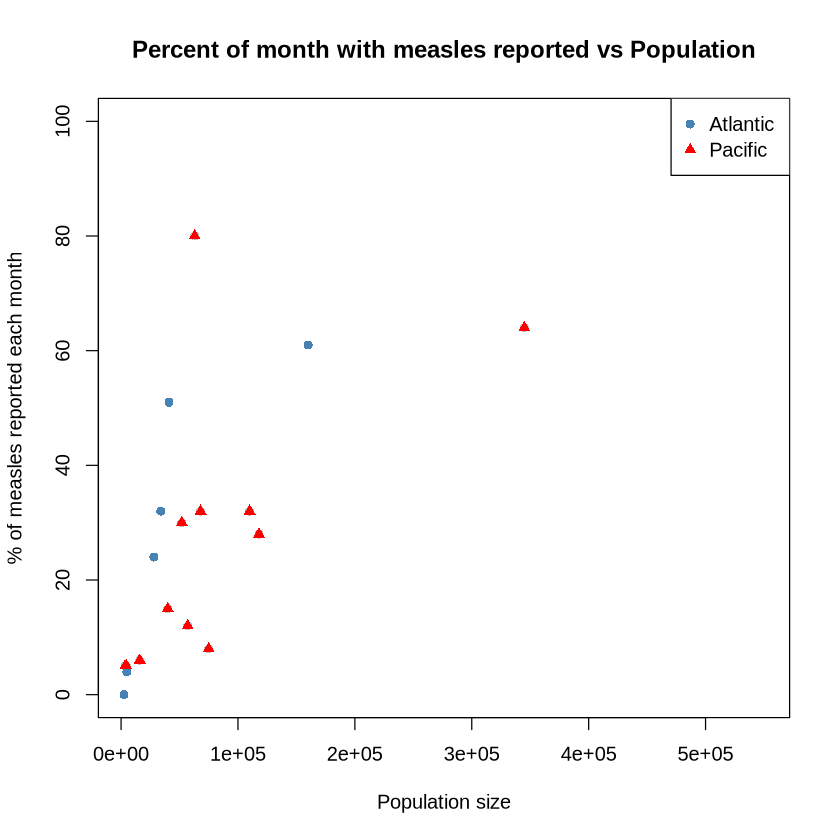

In [11]:
plot(measles$Population, measles$Percentage.months.measles,
     xlab = "Population size",
     ylab = "% of measles reported each month",
     main = "Percent of month with measles reported vs Population",
     pch = 16,
     col = "grey",
)

points(measles$Population[measles$Region=="Atlantic"],
       measles$Percentage.months.measles[measles$Region=="Atlantic"],
       col = "steelblue", pch = 16)

points(measles$Population[measles$Region=="Pacific"],
       measles$Percentage.months.measles[measles$Region=="Pacific"],
       col = "red", pch = 17)

legend("topright",
       legend = c("Atlantic", "Pacific"),
       col = c("steelblue", "red"),
       pch = c(16, 17))

# Statistical Testing and Density Plots

## Preparing some statistical testing

### Performing Two Sample T-test

For the t-test, I wanted to see if there was a statistically significant difference in the population size between the two regions of the Atlantic and Pacific. The reason why I had to do a two-sample t-test is because I was comparing the population, which is a continuous variable, to two independent variables, which are the regions.

**Null Hypothesis** - The mean population between the Atlantic and Pacific is going to be the same

**Alternative Hypothesis** - The mean population between the Atlantic and Pacific are going to be different

The t-test was coded by creating the vectors for the regions, called 'atlantic' and 'pacific' to separate them from the measles.csv file. After I used the ```t.test()``` function to conduct the t-test.

In [11]:
atlantic <- measles$Population[measles$Region == 'Atlantic']
pacific <- measles$Population[measles$Region == 'Pacific']

t_test <- t.test(atlantic, pacific,
                 alternative = "two.sided",
                 var.equal = TRUE)

print(t_test)


	Two Sample t-test

data:  atlantic and pacific
t = -1.0521, df = 17, p-value = 0.3075
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -211782.49   70841.46
sample estimates:
mean of x mean of y 
 45083.33 115553.85 



<b>WHAT I FOUND:<b>

From the results printed below, it is shown that the **p-value is 0.3075**. Since the p-value is **greater than 0.05**, this means that we have **failed to reject the null hypothesis**. Since we have failed to reject the null hypothesis, it means there wasn't enough data/the data wasn't strong enough to indicate that there was a statistical significant difference in population sizes between the two regions.

### Performing One-way ANOVA

For the ANOVA testing, I wanted to see if there was any statistically significant difference in the measles reporting rate and percentage month measles among the different regions. The reason why this has to be a **One-way ANOVA** is because the measles reporting rate and measles percentage months are continuous variables sd since we are comparing it to the regions, which is a categorical variable, this is the best statistical testing to do. This is done by the ```aov()``` funtion.

**Null Hypothesis** - The mean is going to be the same across all regions

**Alternative Hypothesis** - At least one of the means is going to be different across the regions

In [4]:
measles_reporting_rate <- aov(Measles.reporting.rate ~ Region, data = measles)
summary(measles_reporting_rate)

measles_percentage_months <- aov(Percentage.months.measles ~ Region, data = measles)
summary(measles_percentage_months)

            Df Sum Sq Mean Sq F value Pr(>F)  
Region       1   2549  2549.2   4.416 0.0518 .
Residuals   16   9237   577.3                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

            Df Sum Sq Mean Sq F value Pr(>F)
Region       1     48    47.7   0.056  0.815
Residuals   17  14378   845.8               

**WHAT I FOUND:**

• From both the measles reporting rate and the percentage months, we have **failed to reject the null hypothesis** for both, this is because both the p-values are larger than 0.05

**Measles Reporting Rate** - 0.0518
     
**Measles Percentage Months** - 0.815

## Preparing density plots

### Violin density Plot - Showing the distribution of population sizes by region

I decided to create a violin density for the population sizes between the regions to see which one had a higher population, which was skewed or their bimodal distribution.

This is done by using the **ggplot2 library** and the ```geom_violin()``` function. I then used commands like the ```element_text()``` function to control the font, font style, font size and where to add the text. I also used a package called **RColorBrewer** on R (some reason it wasn't downloading on JuypterHub) to set the ```scale_color_brewer```.

**From what I found out from the violin plot**: The Pacific region has a wider range of population sizes compared to those in the Atlantic Region - This is because the violin  plot is taller and more spread out/have three peaks

The Pacific region has a bimodal distribution since there are two peaks in the population size.

Warning message in plot_theme(plot):
“The `legend` theme element is not defined in the element hierarchy.”


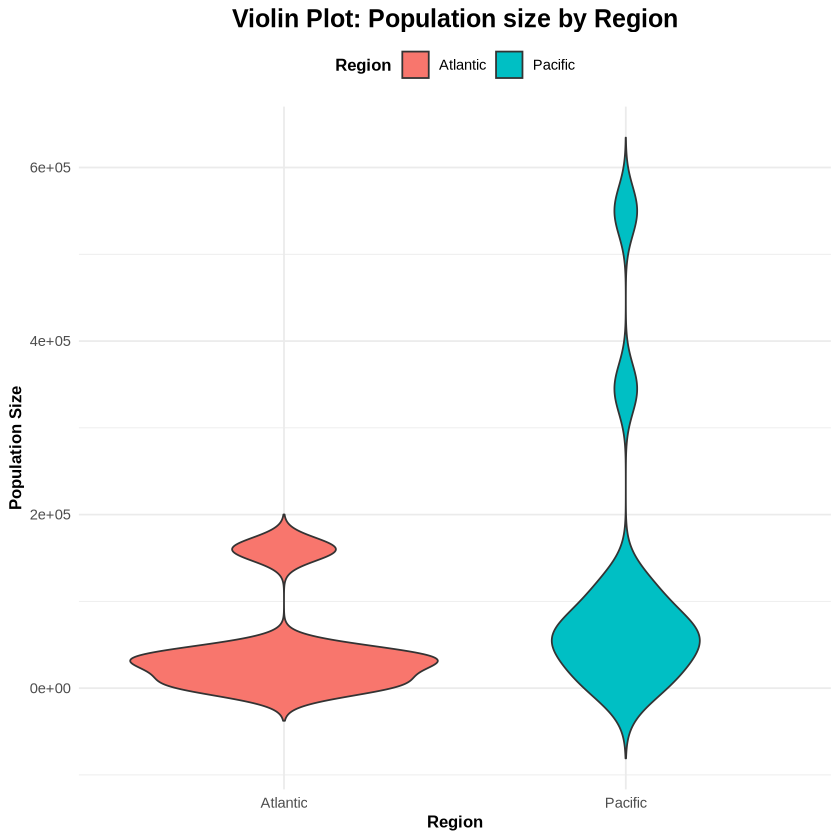

In [4]:
population_violin <- ggplot(measles, aes(x = Region, y = Population, fill = Region)) +
  geom_violin(trim = FALSE) +
  labs(title = "Violin Plot: Population size by Region",
       x = "Region",
       y = "Population Size") +
  theme_minimal() +
  scale_color_brewer(palette = "Set1") + 
  theme(axis.title.x = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'), 
        axis.title.y = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        plot.title = element_text(hjust = 0.5, colour = "black", size = 15, face = 'bold', family = 'Arial'),
        plot.subtitle = element_text(hjust = 0.5, colour = "black", size = 12, face = 'bold', family = 'Arial'),
        legend.title = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        legend = element_text(colour = "black", size = 6, family = 'Arial'),
        legend.position = "top")

print(population_violin)

### Density Plot - Comparing how % of months varies between regions

After doing my violin plot, I decided to do another density graph comparing how the percentage of measles reported each month varies between the two regions. This is done again with the **ggplot2 library**, where I used the ```geom_density()``` function and used the same ```element_text()``` function to change my plot.

**From what I from the density plot**: Atlantic has a higher overall density compared to the Pacific, even if it has the highest peak, suggesting that the Atlantic region has more of a widespread measles outbreak.

Warning message in plot_theme(plot):
“The `legend` theme element is not defined in the element hierarchy.”


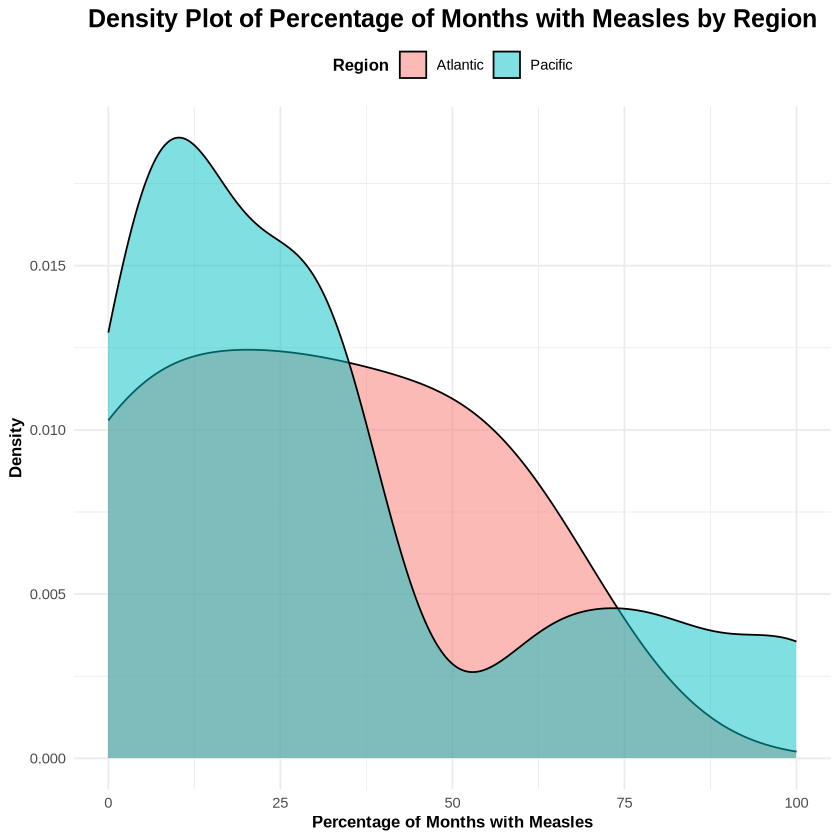

In [5]:
percentage_months_regions <- ggplot(measles, aes(x = Percentage.months.measles, fill = Region)) +
  geom_density(alpha = 0.5) + 
  labs(title = "Density Plot of Percentage of Months with Measles by Region",
       x = "Percentage of Months with Measles",
       y = "Density") +
  theme_minimal() +
  scale_color_brewer(palette = "Set1") + 
  theme(axis.title.x = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'), 
        axis.title.y = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        plot.title = element_text(hjust = 0.5, colour = "black", size = 15, face = 'bold', family = 'Arial'),
        plot.subtitle = element_text(hjust = 0.5, colour = "black", size = 12, face = 'bold', family = 'Arial'),
        legend.title = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        legend = element_text(colour = "black", size = 6, family = 'Arial'),
        legend.position = "top")

print(percentage_months_regions)

# External Dataset Comparisons

The aim of using external datasets to compare with the ```measles.cvs``` results from 1956 was to understand the changes in patterns/evolution of the measles epidemiology over time. This would help gain access to assess the impact of public health interventions that aided in controlling the spread of measles. 

**Assumption/Predictions:**

• **There would be fewer reportings:** It can be assumed that reporting of measles would decrease over the years, this is because the first vaccines were introduced and approved in March 1963 (Hendriks and Blume, 2013) meaning more people would have protection against the virus and, consequently, the number of cases being reported would decrease.

• **There would be an increase in MCV1 and MCV2 vaccinations:** It can be predicted that around/after 1963, there would be an increase in vaccinations for infants given from the regions: **Fiji, Iceland and Tonga**.

Before preparing any comparisons, I researched reporting of measles cases from 2022-1974 from the WHO (World Health Organisation) website ([here](https://apps.who.int/gho/athena/data/GHO/WHS3_62?profile=xtab&format=html&x-topaxis=GHO;YEAR&x-sideaxis=COUNTRY&x-title=table&filter=COUNTRY:*;REGION:*&ead=)) and tried to find as many regions I could, so it can be compared to the ```measles.cvs```. After finding **Fiji**, **Iceland** and **Tonga**, I filtered the data to contain only those regions and downloaded the csv file, naming it ```WHO_measles.cvs```.

After, I decided to create a line plot to showcase the number of measles reports from 1974 to 2022 to understand and confirm my assumptions that there would be fewer reports as the years went on.

In [10]:
# I had to tidy the csv file since it was hard to read/understand
# Using 'skip = 1' allowed me to skip the first row since it wasn't necessary
WHO_measles <- read.csv("WHO_measles.csv", skip = 1)
# Needed to change to column name to "Country" and then followed by the years 
colnames(WHO_measles) <- c("Country", as.character(2022:1974)) 

# I needed to tidy the dataset since it was really messy
# gather will make the data go from wide to long and the key function will make the years a column 
# -Country to not convert the country column
WHO_tidy <- WHO_measles %>%
  gather(key = "Year", value = "Cases", -Country) %>%
  mutate(Cases = as.numeric(Cases))
# I needed to case the cases column numeric since it was seems as a character 
# I used the pipe operator to link each command together

# This is to make sure the Year column is numeric as well
WHO_tidy$Year <- as.numeric(as.character(WHO_tidy$Year))

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_point()`).”


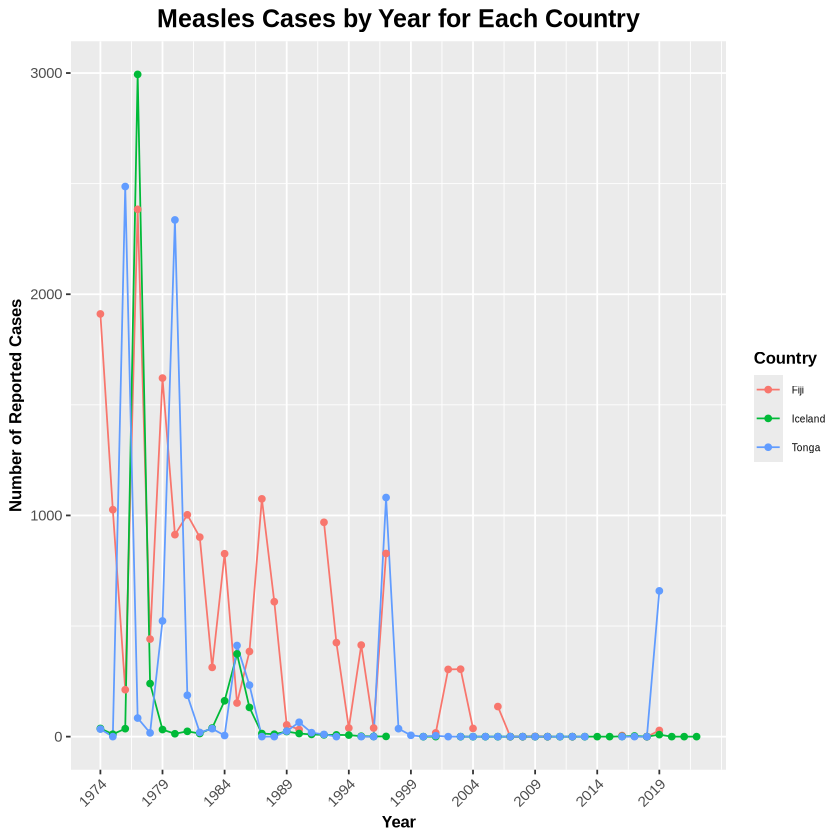

In [11]:
# Creating the plot
ggplot(WHO_tidy, aes(x = Year, y = Cases, group = Country, color = Country)) +
  geom_line() +
  geom_point() +
  labs(title = "Measles Cases by Year for Each Country", 
       x = "Year", 
       y = "Number of Reported Cases") +
  scale_x_continuous(breaks = seq(1974, 2022, by = 5)) + # Had to break the years by 5, since the years were getting squished on the x-axis
  theme(axis.title.x = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'), 
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.y = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        plot.title = element_text(hjust = 0.5, colour = "black", size = 15, face = 'bold', family = 'Arial'),
        plot.subtitle = element_text(hjust = 0.5, colour = "black", size = 12, face = 'bold', family = 'Arial'),
        legend.title = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        legend.text = element_text(colour = "black", size = 6, family = 'Arial'),
        legend.position = "right")

**WHAT I FOUND:**

When analysing the line graph, you can see that over some time between 1974 and 2019 (since I used the ```break``` function to make the years go in 5 year intervals) there was a gradual decrease in measles reports between all countries/regions. On further analysis, you can see that Iceland was the first region that maintained a low reporting rate annually, compared to Tonga and Fiji, who seems to be struggling to report 0 cases of measles. This struggle can be seen around 2014-2019, where Tongo had a sudden increase in reports even after maintaining a low reporting rate.

The possible reasons for this are:

1. Tonga has some irregularity in reporting measles cases according to my ```WHO_measles.csv``` file, as there are empty gaps in the years before and after 2019. This could mean the standard in surveillance is not up to standard, possibly causing delays in reports or none at all, indicating the possibility that we are missing crucial data that could used to help strengthen the prevention of measles before any possible outbreak could happen (Clements et al, 2016).

2. Iceland has a stronger healthcare infrastructure and relationship towards the general public compared to Tonga, which influences its capacity to prevent and manage outbreaks. Between October and December of 2019, there was a measles outbreak in Tonga (Kaspar, Pifeleti and Whitfield, 2020) and one major factor that could have contributed to this outbreak, with along the lack of surveillance, was a lack of MCV (measles vaccination) coverage (Clements et al, 2016). This difference in infrastructure is shown through Iceland giving two vaccinations with the first being between 14-18 months (over 1 year old) and the second (a booster) given at the age of 9 years (Glismann, Ronne and Schmidt, 2001). This is similar in Tonga since the first vaccine is given at 12 months (1 year old) and the booster is given at (18 months) according to the [WHO](https://immunizationdata.who.int/global/wiise-detail-page/vaccination-schedule-for-measles?ISO_3_CODE=TON&TARGETPOP_GENERAL=). However, it has struggled with public confidence. It has been suggested that an incident in [Samoa](https://www.bbc.co.uk/news/world-asia-50625680) caused vaccine hesitancy, causing a lower MCV coverage rate. This situation highlights the importance and fragility of public trust when it comes to vaccinations. The incident also uncovers a possible lack of supplies because the incident was caused by an expired anaesthetic.

This disparity in trust was further highlighted when an internet based study was conducted in Iceland. The study showcased that 95% of the participants (10,544 people in the study) had a positive attitude towards childhood vaccinations and this is reflected when asked whether they would like to have their children immunized according to the vaccination schedule (Óskarsson et al., 2015).

Continuing with external datasets, I managed to find a dataset that included the immunisation coverage estimates for measles (MCV1 and MCV2) for children. This data was collected by the World Health Organisation (WHO), but was constructed by a user on [Kaggle](https://www.kaggle.com/datasets/lsind18/who-immunization-coverage). The datasets included percentages of children (aged 12-23 months) who received the first dosage (```MCV1.cvs```) and the second dosage (```MCV2.cvs```) from 2000-2021.

From those two datasets, I decided to compare them both by constructing a bar chart to check if my prediction of an increase in MCV1 and MCV2 vaccinations was correct with the regions I had compared earlier (Fiji, Iceland, Tonga).

In [19]:
# I had to first tidy the dataset again like I did with the first one
# Using the %>% operator from the dplyr packages, I can quickly clean up the dataset
# setNames - I needed to remove the 'X' that was in front of the years 
# Gather - Change the wide to the long format for the dataset 
# Making sure the years were numeric since they were set to character
mcv1 <- read.csv("MCV1.csv") %>%
setNames(c("Country", as.character(2021:2000))) %>%
gather(key = "Year", value = "MCV1", -Country) %>%
mutate(MCV1 = as.numeric(MCV1))

mcv2 <- read.csv("MCV2.csv") %>%
setNames(c("Country", as.character(2021:2000))) %>%
gather(key = "Year", value = "MCV2", -Country) %>%
mutate(MCV1 = as.numeric(MCV2))

# Needed to merge the two datasets so I can compare them
mcv1_2 <- merge(mcv1, mcv2, by = c("Country", "Year"))

# Needed to separate the vaccine types and coverage percentage to their own columns
mcv <- mcv1_2 %>%
gather(key = "Vaccine", value = "Coverage", MCV1.x, MCV2)

# Filter Iceland, Fiji and Tonga from the dataset, so I can compare them
IFT <- c("Iceland", "Fiji", "Tonga")
IFT_data <- mcv %>% filter(Country %in% IFT)

Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_bar()`).”


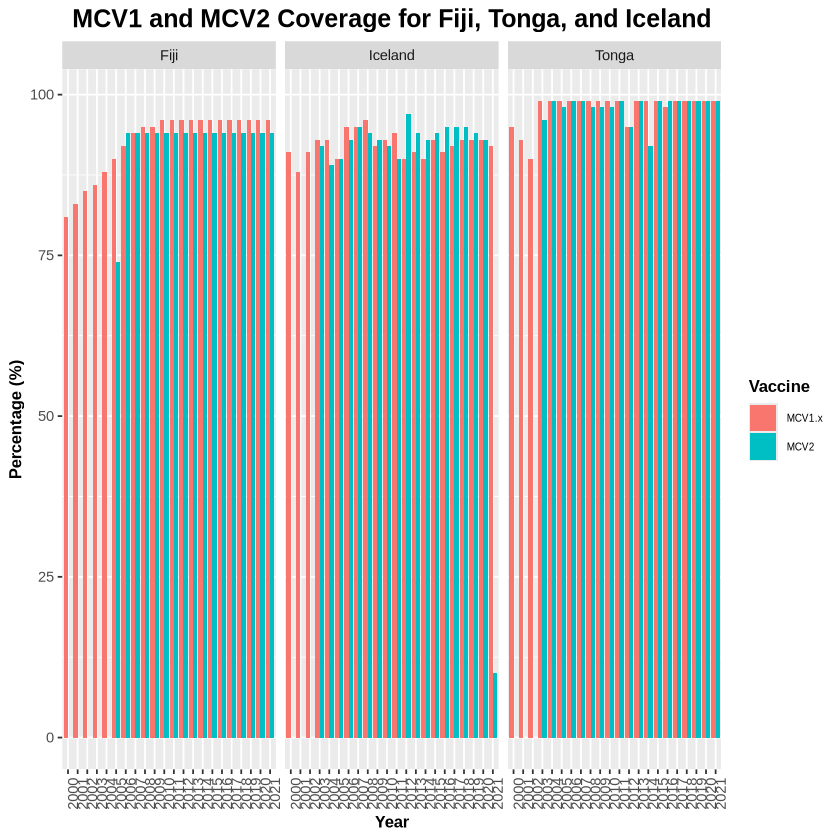

In [26]:
# Creating the bar chart to compare the coverage estimates between the two vaccines
ggplot(IFT_data, aes(x = Year, y = Coverage, fill = Vaccine)) +
  geom_bar(stat = "identity", position = "dodge") + # "identity' to use the actual values for the y-axis and 'dodge' to make sure the bars are next to each other.
  facet_wrap(~ Country) +
  labs(title = "MCV1 and MCV2 Coverage for Fiji, Tonga, and Iceland",
       x = "Year",
       y = "Percentage (%)",
       fill = "Vaccine") +
  theme(axis.title.x = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'), 
        axis.text.x = element_text(angle = 90, hjust = 1), # To make the year look more visible
        axis.title.y = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        plot.title = element_text(hjust = 0.5, colour = "black", size = 15, face = 'bold', family = 'Arial'),
        plot.subtitle = element_text(hjust = 0.5, colour = "black", size = 12, face = 'bold', family = 'Arial'),
        legend.title = element_text(colour = "black", size = 10, face = 'bold', family = 'Arial'),
        legend.text = element_text(colour = "black", size = 6, family = 'Arial'),
        legend.position = "right")

**WHAT I FOUND:**

Overall, when analysing the data, all three regions seem to have a strong vaccine program, as each region maintains an over 90% coverage rate for children. Fiji and Tonga have maintained a high MCV1 and MCV2 coverage, even with the measles outbreak that occurred in 2019, showing potential international efforts to help encourage people to get their children vaccinated and slowly gaining the public's confidence/trust back. Iceland shows more variability compared to Fiji and Tonga. However, it still has a 90% coverage rate from 2000-2021.

This indicates that there has been an increase in vaccinations since 1963, helping improve the protection against measles for each of the regions. However, despite the positive trend in vaccinations, the datasets only show the coverage of those who are infants (12-24 months old), rather than **a wider and more diverse population** (including older children, adults who weren't vaccinated before, etc). 

Another limitation towards the data is that it doesn't provide insight in how much the vaccine has been distributed in each country. Certain people may not have access to good healthcare due to their income or location, making it difficult to note on how well distributed the vaccine is.

**Conclusion:**

Based from the following datasets that I have found (WHO measles reportings from 1974-2022 and the measles coverage with MCV1 and MCV2 from 2000-2022) across Iceland, Fiji and Tonga, I can answer my assumptions that:

• **Fever reportings:** There have been fewer reportings of measles from 1974-2022 between all the regions, with Iceland providing >10 reportings from 1991-2022, with most years having 0. However, Fiji and Tonga have some inconsistency when reporting any measle cases, most likely due to poor surveillance. However, due to an outbreak, there was a sudden reporting of 659 cases.

• **More Vaccinations:** There has been a higher coverage rate in vaccinations with each region producing a consistent 90% when it came to MCV1 and MVC2 vaccinations for infants and children. However, this does not showcase an increase in protection for adults who could have not been vaccinated before.

While my initial predictions were along the right lines, there are still some limitations that need to be addressed when answering and concluding my final assumptions:

• **Limited Geographical Scope:** While both my datasets give off positive trends in the prevention of measles, it doesn't provide any information on how well distribution the immunisation coverage is meaning the data is limited. Expanding on this analysis will provide a more boarder view on how protected each region is, especially those in less developed countries.

• **Inconsistency in reporting:** There needs to be a consistent rate of reporting to understand if the data is as accurate as it seems. Having missing values devalues the data's accuracy and possibly underestimates the actual number of measle cases, leaving gaps to know where to focus on when it comes to vaccine programmes.

• **Timeline:** The vaccination datasets only focus on infants and children who have gotten the dose from their vaccination schedules from 2000-2022. However, the ```measles.cvs``` was from 1956, leaving a 66 year gap between the years. This limits on how directly comparable the datasets could be. While there was an increase in vaccinations, was there also an increase between those 66 years?

**Referneces:**

• Soakai, T.S., Sadr-Azodi, N., Ozturk, M. and Clements, C.J., 2016. Measles control in pacific island countries and territories. Ann. Virol. Res, 2(3), p.1022.

• Glismann, S., Ronne, T. and Schmidt, J-.E. (2001). The EUVAC-NET survey: national measles surveillance systems in the EU, Switzerland, Norway, and Iceland. Eurosurveillance, 6(6), pp.105–110. 

• Hendriks, J. and Blume, S. (2013). Measles Vaccination Before the Measles-Mumps-Rubella Vaccine. American Journal of Public Health, [online] 103(8), pp.1393–1401. 

• Kaspar, A., Pifeleti, S. and Whitfield, B.C. (2020). The measles emergency is over, but the crisis continues – a call to action for the Pacific Islands. Journal of Global Health, 10(2). 

• Óskarsson, Ý., Guðnason, Þ., Jónsdóttir, G.A., Kristinsson, K.G., Briem, H. and Haraldsson, Á. (2015). Public opinion on childhood immunisations in Iceland. Vaccine, 33(51), pp.7211–7216.